In [140]:
import pathlib
import os
from fastai.vision.all import ImageDataLoaders, Resize, imagenet_stats, vision_learner, resnet34, error_rate, ClassificationInterpretation
from fastai.vision.data import get_image_files
import numpy as np

from fastai.vision.all import RandomResizedCrop, Flip, Dihedral, ToTensor, Normalize

# Ensure the path is correct and points to the directory containing images
chrono_images_path = pathlib.Path('/home/ubuntu/chrono-analyzer/data/')

# Get all image files from the directory
fnames = get_image_files(chrono_images_path)






In [131]:
resize_transform = Resize(224)

# Define augmentation transforms
tfms = [
    Flip(p=0.5),  # Random horizontal flipping with 50% probability
    Dihedral() # Apply a Dihedral matrix to image
]


# Combine with normalization
final_tfms = tfms + [ToTensor(), Normalize.from_stats(*imagenet_stats)]

In [132]:
# Extract filenames without paths (assuming filenames don't contain slashes)
# fnames = [os.path.basename(path) for path in fnames]
# fnames = [pathlib.Path(path) for path in fnames]

# Adjusted regular expression to capture only the label part
label_pattern = r"(.+)-.+-.+.jpg"


# Create DataLoaders using the extracted information
data = ImageDataLoaders.from_name_re(
    path=chrono_images_path,
    fnames=fnames,
    pat=label_pattern,
    item_tfms=resize_transform,
    batch_tfms = final_tfms,
    valid_pct=0.2,
)



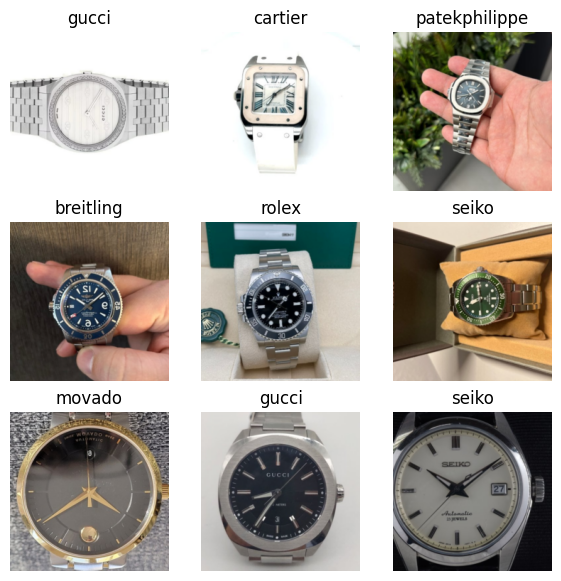

In [134]:
data.show_batch(figsize=(7,7))

In [135]:
learner = vision_learner(data, resnet34, metrics=error_rate)


In [138]:
learner.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.802782,1.072649,0.333676,08:59
1,1.489774,0.372061,0.102669,09:07
2,0.864419,0.207287,0.049281,08:57
3,0.568713,0.156199,0.030801,09:03
4,0.448283,0.150040,0.030801,08:50


In [141]:
interpretation = ClassificationInterpretation.from_learner(learner)

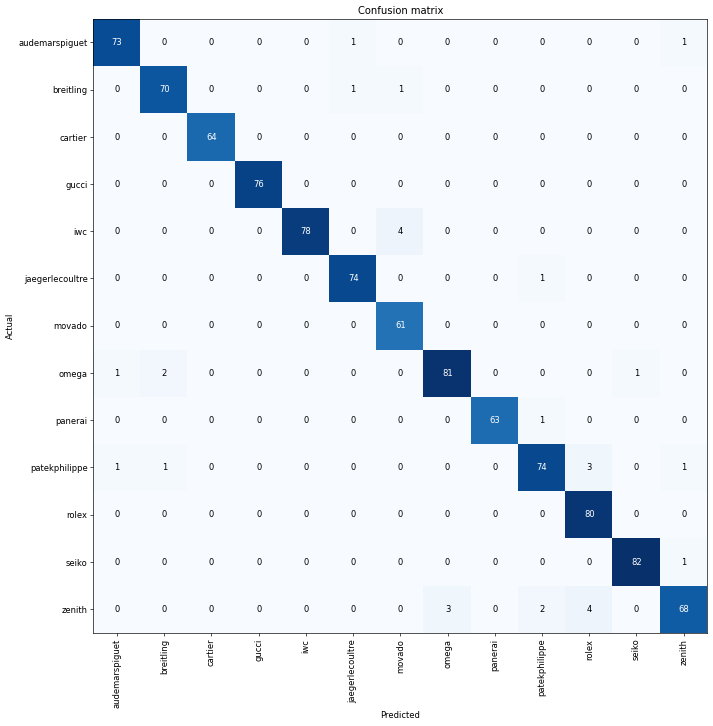

In [142]:
interpretation.plot_confusion_matrix(figsize=(12,12), dpi=60)

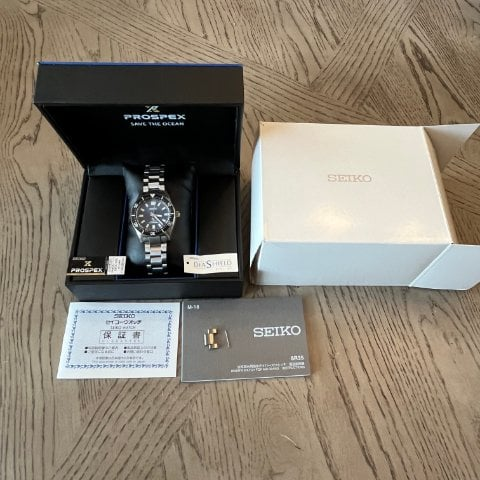

In [145]:
data.valid_ds[180][0]

In [147]:
learner.predict(data.valid_ds[180][0])

('seiko',
 tensor(11),
 tensor([9.1815e-04, 9.5329e-04, 5.9171e-04, 1.4720e-03, 1.4167e-01, 4.9278e-04,
         2.0505e-02, 9.1184e-04, 2.4993e-03, 2.0730e-03, 1.9099e-04, 8.2488e-01,
         2.8466e-03]))

In [149]:
learner.save("stage-1")

Path('/home/ubuntu/chrono-analyzer/data/models/stage-1.pth')

SuggestedLRs(valley=0.002511886414140463)

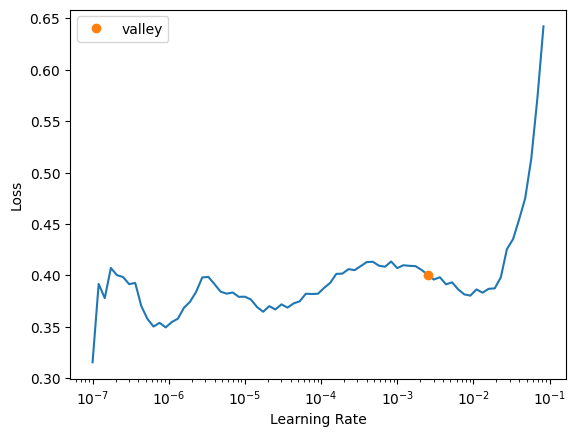

In [151]:
learner.lr_find()

In [156]:
learner.export(fname = 'classifier.pkl')

In [160]:
!ls -a classifier.pkl

ls: cannot access 'classifier.pkl': No such file or directory
